# Digit Recognizer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Data Loading

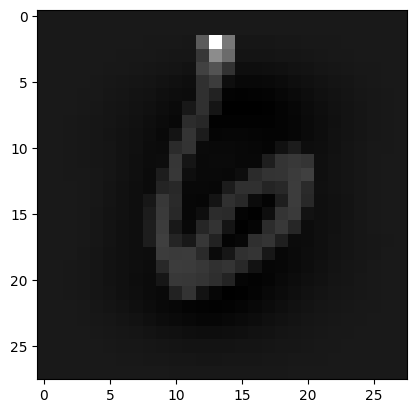

In [2]:
# read the train file
df = pd.read_csv('train.csv')

# split the data into features and labels
X = df.drop('label', axis=1)
y = df['label']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print example of the data
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.show()

# Support Vector Classification

In [3]:
# train the model
model = SVC()
model.fit(X_train, y_train)

# evaluate the model
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[801   0   3   0   1   3   7   0   1   0]
 [  0 892   8   1   1   1   1   2   2   1]
 [  2   6 820   3   4   0   4   2   5   0]
 [  1   3  11 885   0  11   0   9  12   5]
 [  1   0  11   0 805   1   5   4   0  12]
 [  2   1   8  14   1 663  10   1   2   0]
 [  5   1  11   0   0   6 760   0   2   0]
 [  0   2  12   3   5   2   0 854   1  14]
 [  1   4   9  10   4  10   4   2 789   2]
 [  2   2   7  12   7   3   0  19   4 782]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.98      0.98       909
           2       0.91      0.97      0.94       846
           3       0.95      0.94      0.95       937
           4       0.97      0.96      0.97       839
           5       0.95      0.94      0.95       702
           6       0.96      0.97      0.96       785
           7       0.96      0.96      0.96       893
           8       0.96      0.94      0.95       835
           9       0.96     

In [4]:
# read the test file
test = pd.read_csv('test.csv')

# scale the test data
test = scaler.transform(test)

# predict the labels
predictions = model.predict(test)

# write the predictions to a csv file
submission = pd.DataFrame({'ImageId': range(1, len(predictions)+1), 'Label': predictions})
submission.to_csv('submission_svc.csv', index=False)

# CNN

In [15]:
# construct a cnn with pytorch and train it on the data, than predict the labels of the test data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# convert the data to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)




# create a dataset and a dataloader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# create a neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)
    
model = Net()

# define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train the model
for epoch in range(10):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# convert the test data to a tensor
test = torch.tensor(test, dtype=torch.float32)

# predict the labels
predictions = model(test)
_, predictions = torch.max(predictions, 1)

# write the predictions to a csv file
submission = pd.DataFrame({'ImageId': range(1, len(predictions)+1), 'Label': predictions})
submission.to_csv('submission_cnn.csv', index=False)




C:\Users\Hp\AppData\Local\Temp\ipykernel_16036\2327689473.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)


TypeError: 'builtin_function_or_method' object cannot be interpreted as an integer